# Power Factor and Harmonics

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2
        
<img src="./lec4/Slide4.PNG" align="left" width="62%">

We continue our lectures on power calculation. In the previous lectures, we assume the current and voltage waveforms are all sinusoidal. However, as we mentioned briefly, in practice, because of non-ideal components, including power electronics converters, there will be harmonics introduced to the power system.

The slide shows the voltage and current waveforms of an induction machine fed by an inverter measured in our lab. You can see neither voltage nor current are sinusoidal.

```

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide5.PNG" align="left" width="62%">

Today we will study the non-sinusoidal components (harmonics) in power systems, and learn the general power theory for non-sinusoidal waveforms.

```

````

## Harmonics in power systems

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec4/Slide6.PNG" align="left" width="62%">

In an ideal power system, where the loads are linear, the current and voltage will be both sinusoidal. In practice, the following factors will contribute harmonics into the power system:

* Iron saturating devices (transformers or inductors with magnetic core): the magnetic property of the core of the transformer or inductor is nonlinear. The so-called magnetic hysteresis will make the magnetizing current non-sinusoidal when sinusoidal voltage is applied. These [java applets](http://martinhoeijmakers.nl/elektrische-omzettingen/) can help you understand this topic and it will be elaborated in the magnetics part of the course.

* Arcing devices: welders, fluorescent lights, arc furnaces etc. These devices are highly non-linear. Following arc ignition the voltage decreases due to the short-circuit current, which adds harmonics to the power system.

* Power electronics: motor drives, rectifiers, computers, LED lights, EV chargers, etc. The switching of power electronics devices will add high order harmonics to the power system.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide7.PNG" align="left" width="62%">

Before we move on to detailed analysis on harmonics, we first have to figure out a way to quantify them. In 1807 [Jean Baptiste Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) suggested a new method of harmonic analyses developed as a solution to his famous heat equation in a metal plate. The method decomposes a periodic function into infinite series of trigonometric functions, which is called [Fourier series](https://www.jezzamon.com/fourier/). If the function itself is a real function, as the case for current and voltage waveforms in power systems, we are able to use the simplified form of the Fourier series, as shown on the slide. Here the factors $a_v$, $a_n$ and $b_n$ can be calculated as

$$
\begin{align}
\newcommand{\diff}{\mathrm{d}}
a_v &= \frac{1}{T}\int_{t0}^{t0+T}f(t)\diff t \\
a_n &= \frac{2}{T}\int_{t0}^{t0+T}f(t)\cos(n\omega t)\diff t \\
b_n &= \frac{2}{T}\int_{t0}^{t0+T}f(t)\sin(n\omega t)\diff t 
\end{align}
$$
Here $T$ is the period of the original function $f(t)$. In most cases, there is no DC component present in an AC power system, and we are able to combine the $\cos$ and $\sin$ items into $cos$ items with phase shift. This way we are able to write the Fourier series in the form of the last equation on this page. The first item is the fundamental component, while the $n>2$ items are considered to be the distortion from the fundamental component, thus are called **harmonics**. To help you understand better, a Python script below is used to demonstrate the Fourier series of a rectangular waveform.
```

````

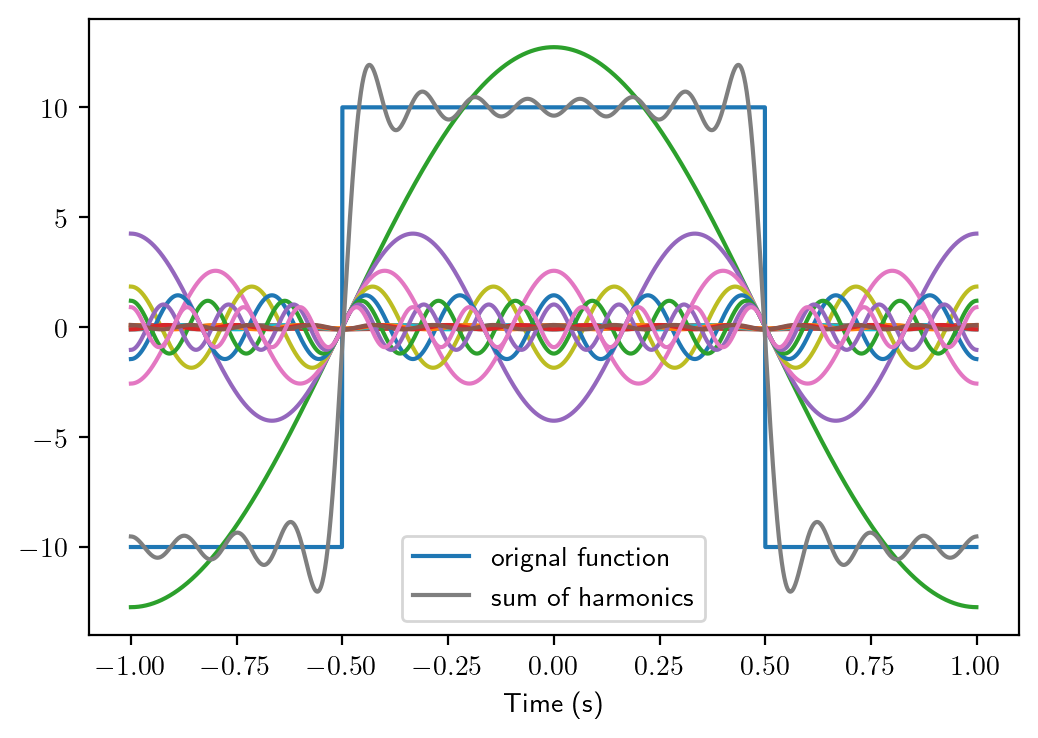

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
import numpy as np
import mpmath as mp

N = 15 # maximum order of harmonics to solve
T = 2  # period
Amp = 10 # amplitude
# Define a rectangular function
@np.vectorize
def rect_fun(x):
    x = x/T
    x_period = x % 1.0 - 0.5
    if (x_period >= -0.25) and (x_period <= 0.25):
        return -Amp
    else:
        return Amp

x = np.arange(-T/2, T/2, 0.001)
y = rect_fun(x)

c, s = mp.fourier(rect_fun, [-T/2, T/2], N) # cos and sin series coefficients
xx   = x[np.newaxis]  # two dimensional time array, time in the columns
an = np.array(c)[:, np.newaxis] # cos coefficient
bn = np.array(s)[:, np.newaxis] # sine coefficient
n  = np.arange(N+1)[:, np.newaxis] # orders

cosines = an*np.cos(2*np.pi*n*xx/T)
sines   = bn*np.sin(2*np.pi*n*xx/T)

plt.plot(x, rect_fun(x), label='orignal function')
plt.plot(x, (sines+cosines).T)
plt.plot(x, sum(sines+cosines), label='sum of harmonics')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec4/Slide8.PNG" align="left" width="62%">

Similar to the sinusoidal voltage/current, we may also calculate the rms or the effective value for the non-sinusoidal waveforms using the definition

$$
V_{rms} = \sqrt{\frac{1}{T}\int_0^Tv^2(t)\mathrm{d}t}.
$$

For the $n$-th harmonic, we know

$$
\begin{align}
&\frac{1}{T}\int_0^T [V_n\cos(n\omega t+\theta_n)]^2\mathrm{d}t \\
&\quad= \frac{V_n^2}{2}= \left( \frac{V_n}{\sqrt{2}}\right)^2
\end{align}
$$

So we can see, the rms or effective value of the non-sinusoidal waveform is the root mean of the sum of the square of the effective value of all harmonics (including the dc component) if there are any.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide9.PNG" align="left" width="62%">

As we can see from the last page, the harmonic component has a non-zero effective value, so it creates loss as well. Therefore the harmonics are considered as "pollution" to the power grid. It should be suppressed to avoid damage to equipment.

The example here shows the additional current created by harmonics in a compensation capacitor.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide10.PNG" align="left" width="62%">

The slide here shows the voltage (upper) and current (lower) waveforms measured by oscilloscopes in a microgrid with many power electronics components connected to it. As you can see, there are high order harmonics in the current waveform, which is caused by the fast switching of the power electronics converters.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide11.PNG" align="left" width="62%">


The example here shows a different application. The power electronics converter is driving an AC motor. The voltage waveform is a switching waveform with high harmonic content, while the current is more sinusoidal because of the attenuation of the inductance in the AC motor.

For either example, we have to address the question about power calculation considering the harmonic content in the waveforms.

```
````

## Power calculation of harmonics

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec4/Slide12.PNG" align="left" width="62%">

It is essential to calculate the power associated to harmonics to evaluate the influence of it. By integrating the instantaneous power $v(t)i(t)$ and taking the average of the result, we are able to obtain the average power. By applying it to the Fourier series of non-sinusoidal voltage and currents. We can see that only the voltage and current harmonics with the same order will create a non-zero average (by applying the trigonometric identities, and is proven in the python code below). Therefore, the average power can be calculated as the sum of the average power created by the voltage and current harmonic pair with the same order. 
```
````

In [2]:
from sympy import *
m, n = symbols('m, n', integer=True, positive=True)
V_m, I_n, t, theta_m, phi_n = symbols('V_m, I_n, t, theta_m, phi_n')
omega = symbols('omega', nonzero=True)

v=V_m*cos(m*omega*t+theta_m)
i=I_n*cos(n*omega*t+phi_n)
T = 2*pi/omega
p_av = 1/T*integrate(v*i, (t,0,T))
print('The average power of the m-th-voltage and n-th-current pair is:')
simplify(p_av)

The average power of the m-th-voltage and n-th-current pair is:


Piecewise((0, Ne(m, n)), (I_n*V_m*cos(phi_n - theta_m)/2, True))

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec4/Slide13.PNG" align="left" width="62%">

From the above equation, we can see there are three different scenarios for a zero average power for certain harmonic pair: first is of course either the voltage harmonic or the current harmonic is zero. The second scenario is shown here, when the power factor of the harmonic pair of the same order is 0 (either purely inductive or purely capacitive).

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide14.PNG" align="left" width="62%">

The third scenario will be the case when the harmonic orders do not match. As shown in the example here, the order of the current harmonic is 2, while the voltage is the fundamental one.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide15.PNG" align="left" width="62%">

If we calculate the instantaneous power and take the integral, we will see the result is 0.
The Python code below is used to verify this numerically.

```
````

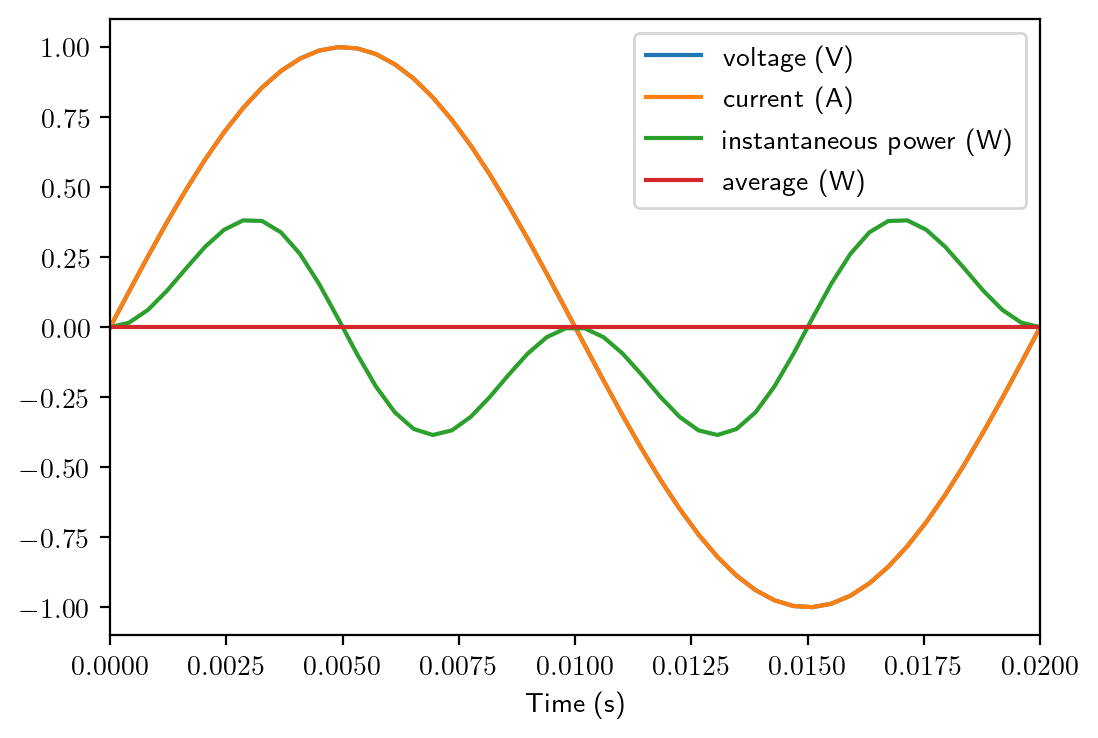

In [3]:
t = np.linspace(0, 1/50.0, 50)
v = np.sin(2*np.pi*50*t) # 50 Hz
i = 1/2.0*np.sin(2*2*np.pi*50*t) # 2nd order

p = v*i
plt.figure()
plt.plot(t, v, label='voltage (V)')
plt.plot(t, v, label='current (A)')
plt.plot(t, p, label='instantaneous power (W)')
plt.plot(t, np.average(p)*np.ones_like(p), label='average (W)')
plt.xlabel('Time (s)')
plt.xlim([0, 0.02])
plt.legend()
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec4/Slide16.PNG" align="left" width="62%">

This example is more complicated than the previous one. Please try to work it out yourself and click the code below to verify your answer.

```

````

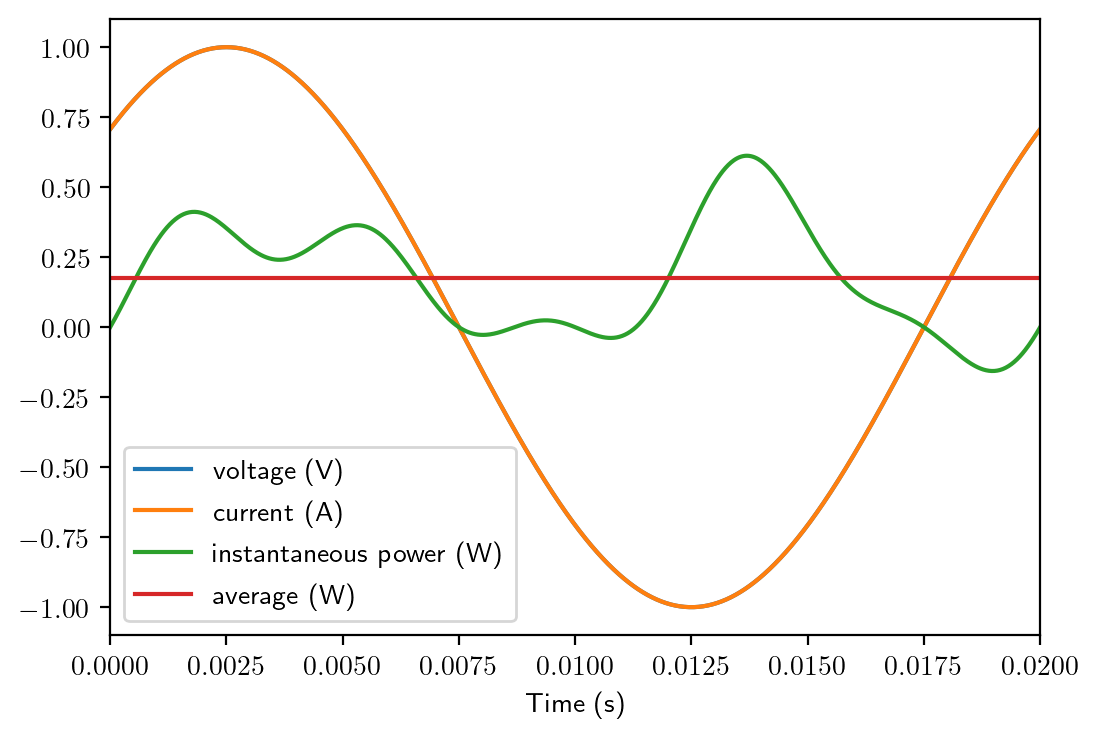

The average power is 0.177 W


In [4]:
t = np.linspace(0, 1/50.0, 1000)

v = np.sin(2*np.pi*50*t+np.pi/4) # 50 Hz, 45 degree converted to radians
i = 1/2.0*np.sin(2*np.pi*50*t) + 1/5.0*np.sin(4*2*np.pi*50*t) # fundamental and 4th order

p = v*i

plt.figure()
plt.plot(t, v, label='voltage (V)')
plt.plot(t, v, label='current (A)')
plt.plot(t, p, label='instantaneous power (W)')
plt.plot(t, np.average(p)*np.ones_like(p), label='average (W)')
plt.xlabel('Time (s)')
plt.xlim([0, 0.02])
plt.legend()
plt.show()
print('The average power is {:.3f} W'.format(np.average(p)))

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


        
<img src="./lec4/Slide18.PNG" align="left" width="62%">

From the analysis and example above, we know that the average power can be calculate by summing up the average power of each harmonic pair with the same order (including the 0-th, or the fundamental pair). For each harmonic pair with the same order, the power can be calculated by the the product of the rms voltage, rms current and power factor of that order.

For a resistive load, we are able to obtain the voltage equation in Fourier series by multiplying the current Fourier series by the real resistance $R$, according to Ohm's Law.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide19.PNG" align="left" width="62%">

Since the voltage and current harmonic pairs are always in phase for a resistive load, we are able to derive the power equation for the resistive load under non-sinusoidal waveforms as shown on the slide. In the end, the average power is equal to the square of the rms current of the non-sinusoidal current multiplied by the resistance.

This is of course a special case, now let's look at mthe general power theory which is valid for all kinds of load.

```
````

## General power theory of non-sinusoidal waveforms

`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec4/Slide21.PNG" align="left" width="62%">

In a power grid, the voltage is often sinusoidal but the currents are often distorted. As we previously mentioned, the saturation in transformers/inductors, or the rectifiers/switching in industrial drives will cause that.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide22.PNG" align="left" width="62%">

In such a case, we will consider a voltage with fundamental component only, and a non-sinusoidal current waveform. According to our previous analysis, only the harmonic pair with the same order (this case only the fundamental ones) will create non-zero average power. So we have

$$
P = VI_1\cos(\theta-\phi_1)
$$

Apparently, in such a case, we are not able to calculate the power with the rms voltage and rms current of the whole waveforms.


```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide23.PNG" align="left" width="62%">

To keep the power equation form unchanged compared to the power theory of sinusoidal waveforms, we have to introduce two definitions. Now we define the power factor for the sinusoidal voltage + non-sinusoidal current case as:

$$
\begin{align}
\mathrm{pf} &= \frac{P}{V_{rms}I_{rms}} \\
&= \frac{VI_1\cos(\theta-\phi_1)}{V\sqrt{I_{dc}^2+\sum_{n=1}^\infty I_n^2}}\\
&= \cos(\theta-\phi_1)\frac{I_1}{\sqrt{I_{dc}^2+\sum_{n=1}^\infty I_n^2}}
\end{align}
$$

The right half of the last equation is defined as a distortion factor, which is actually the ratio between the rms of the fundamental component and the rms of total waveform, and indicates how the waveform shape is distorted from sinusoidal. While the left part is defined as the displacement factor, which shows the phase displacement between the fundamental components.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide25.PNG" align="left" width="62%">


Sometimes it is beneficial to speak of the amount of distortion in a signal. Let’s
define a new term the **Total Harmonic Distortion** or THD which is defined as the
ratio of the rms value of the distortion present in the waveform to the rms value of
the fundamental. Mathematically this can be expressed, for a current, as shown on the slide.

This means that in systems where the voltage source is undistorted, and no dc component, the distortion
factor and the THD are closely related as

$$
\text{distortion factor} = \frac{1}{\sqrt{1+\mathrm{THD}^2}}.
$$

Similarly, we are able to deal with systems with sinusoidal current+non-sinusoidal voltage, or both non-sinusoidal, based on the harmonic components approach as shown above.


```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec4/Slide26.PNG" align="left" width="62%">

Let's practice with the example here. Please try it yourself then check with the slides below.

```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

```{admonition} Click here for solutions.
:class: tip, dropdown

<img src="./lec4/Slide27.PNG" align="left" width="62%">


<img src="./lec4/Slide28.PNG" align="left" width="62%">

```

````
`````